In [2]:
import pandas as pd

# Load the dataset from a local file
data = pd.read_csv('diabetes.csv')  # Ensure the file is in the current working directory

# Display the first few rows of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Preprocess the Data
# Replace 0 values with NaN for certain columns and fill them with the mean
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    data[column] = data[column].replace(0, pd.NA)
    data[column].fillna(data[column].mean(), inplace=True)

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\DELL\AppData\Local\Temp\ipykernel_17576\3259271025.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17576\3259271025.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column].fillna(data[column].

In [5]:
# Build the Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer and hidden layer
model.add(Dense(8, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# Train the Model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.1, verbose=0)


In [7]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy: 0.7143
Precision: 0.5932
Recall: 0.6364
F1 Score: 0.6140


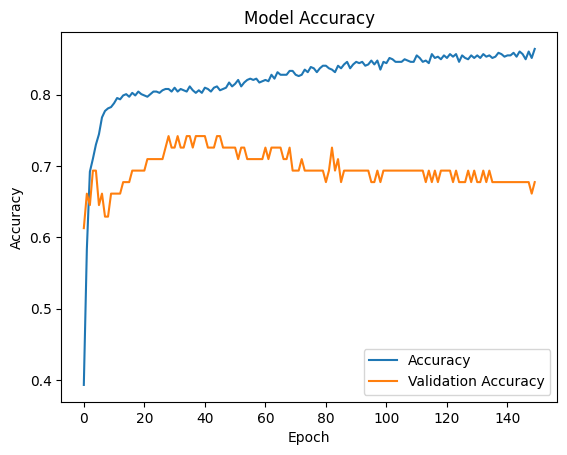

In [8]:
# Plotting the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
